### **BANK TRUST RFM ANALYSIS USING UNSUPERVISED LEARNING**


**Importing Libraries and Settings**

pandas, numpy: For data loading, cleaning, and numerical operations.

matplotlib, seaborn: For creating visualisations and exploring data patterns.

datetime: For handling and manipulating date-related fields.

warnings: To suppress unnecessary warning messages for cleaner output.

StandardScaler: To normalise numerical features before clustering.

K-Means: The clustering algorithm used for segmenting the data.

silhouette_score: To evaluate the quality of the clustering results.

plt.style.use, sns.set_palette: To improve the aesthetics of the plots.


In [160]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

## **Loading datasets**

In [161]:
df=pd.read_csv("/content/Bank_Trust_Dataset.csv")

df.head(7)

,TransactionID,CustomerID,TransactionDate,TransactionTime,TransactionAmount,CustomerDOB,CustGender,CustLocation,CustAccountBalance
0,T9105905,C1419610,2021-06-18,74921,177.72,1991-08-13,F,East Gordonside,29923.49
1,T3229540,C1419610,2021-07-16,145601,304.89,1991-08-13,F,East Gordonside,29618.60
2,T5116286,C1419610,2021-01-14,113217,79.68,1991-08-13,F,East Gordonside,29538.92
3,T4475301,C5614226,2020-04-03,72506,3685.28,1956-09-29,M,Donaldfort,62152.00
4,T2953823,C5614226,2020-12-15,143619,5452.50,1956-09-29,M,Donaldfort,56699.50
5,T8158456,C5614226,2020-01-10,114835,7106.78,1956-09-29,M,Donaldfort,49592.72
6,T5402092,C5614226,2022-10-11,74538,4890.07,1956-09-29,M,Donaldfort,54482.79


In [162]:
#Checking for the dataset properties
df.info()

print(f"The shape of the dataset is:{df.shape}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947917 entries, 0 to 947916
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   TransactionID       947917 non-null  object 
 1   CustomerID          947917 non-null  object 
 2   TransactionDate     947917 non-null  object 
 3   TransactionTime     947917 non-null  int64  
 4   TransactionAmount   947917 non-null  float64
 5   CustomerDOB         947917 non-null  object 
 6   CustGender          947917 non-null  object 
 7   CustLocation        947917 non-null  object 
 8   CustAccountBalance  947917 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 65.1+ MB
The shape of the dataset is:(947917, 9)


In [163]:
#The dataset columns
print(df.columns)

#the dataset Row
print(df.index)

Index(['TransactionID', 'CustomerID', 'TransactionDate', 'TransactionTime',
       'TransactionAmount', 'CustomerDOB', 'CustGender', 'CustLocation',
       'CustAccountBalance'],
      dtype='object')
RangeIndex(start=0, stop=947917, step=1)


In [164]:
#Checking for missing value
df.isnull().sum()

,0
TransactionID,0
CustomerID,0
TransactionDate,0
TransactionTime,0
TransactionAmount,0
CustomerDOB,0
CustGender,0
CustLocation,0
CustAccountBalance,0


From the dataset above it shows there is no missing values

In [165]:
#checking the structure of the dataset
df.describe()

,TransactionTime,TransactionAmount,CustAccountBalance
count,947917.000000,947917.000000,947917.000000
mean,117862.497794,1575.545842,25664.142689
std,69295.879093,2670.821963,36565.245859
min,0.000000,1.000000,0.000000
25%,55820.000000,44.830000,2760.070000
50%,115937.000000,66.360000,11664.620000
75%,175946.000000,3238.680000,33544.890000
max,235959.000000,22032.730000,456249.980000


## Task 2

In [166]:
#Checking if there is duplicate
df.duplicated().sum()

np.int64(0)

In [167]:
#Checking for duplicate transactionsID
transactionIdDUP = df[df.duplicated('TransactionID')]

print(f"The duplicated number of transaction ID is: {transactionIdDUP.shape[0]}")


The duplicated number of transaction ID is: 48431


In [168]:
#Drop the duplicates Transaction ID
df.drop_duplicates(transactionIdDUP, inplace=True)
df.duplicated(transactionIdDUP).sum()

np.int64(0)

The data now shows that there is no duplicated TransactionID

The dataset shows that there is no duplicate

In [169]:
#number of Unique customerID
print(f"The number of unique CustomerID are:{df['CustomerID'].nunique()}")

The number of unique CustomerID are:82000


Analyzing Gender Distribution


In [170]:
#The total sum of both male and female
print(f"The total number of both Genders are:{df['CustGender'].value_counts()}")

The total number of both Genders are:CustGender
M    474360
F    473557
Name: count, dtype: int64


In [171]:
#Total transactions by genders
df.groupby('CustGender')['TransactionAmount'].sum()

,TransactionAmount
CustGender,
F,7.394790e+08
M,7.540077e+08


In [172]:
#Checking the maximum transactions by genders
print(f" This is the maximum transaction by genders:{df.groupby('CustGender')['TransactionAmount'].max().to_frame()}")


 This is the maximum transaction by genders:            TransactionAmount
CustGender                   
F                    21237.53
M                    22032.73


# **Transactions Analysis**

This section identifies and analyses the top 10 customers based on their total transaction amounts, providing valuable insights into high-value clients who contribute the most to overall revenue.
The code first aggregates key metrics per customer, including the total amount spent, number of transactions, average transaction value, most recent account balance, smallest and largest transaction. These aggregated statistics offer a detailed customer-level financial profile.
The data is then sorted to reveal the top 10 highest spenders, enabling a focused look at customer value distribution

In [173]:
#Total transaction Amount
print(f"the number of total transaction amount is:{df['TransactionAmount'].sum():,.2f}")

the number of total transaction amount is:1,493,486,687.56


In [174]:
#Average Transaction Amount
print(f"The Average transaction amount is:{df['TransactionAmount'].mean():,.2f}")

The Average transaction amount is:1,575.55


In [175]:
#The smallest and largets transaction
print(f"min:{df['TransactionAmount'].min()}, max:{df['TransactionAmount'].max()}")

min:1.0, max:22032.73


In [176]:
#The avearage customer account balance
print(f"The average customer account balance is:{df['CustAccountBalance'].mean():,.2f}")

The average customer account balance is:25,664.14


# *Indepth Transaction Analysis*

***Transaction Amount Segments***
The transactions are categorised into defined monetary segments using bins such as Micro (0–100), Small (100–500), Medium (500–1K), Large (1K–5K), and Very Large (5K+). This segmentation enables a clearer understanding of customer spending patterns and helps identify which transaction ranges are most common, supporting deeper behavioural and financial segmentation analyses.


In [177]:
#Transaction amount segments
amount_bins = [0, 100, 500, 1000, 5000, 10000, np.inf]
amount_labels = ['Micro', 'Small', 'Medium', 'Large', 'Very Large', 'Extra Large']
df['TransactionAmountSegment'] = pd.cut(df['TransactionAmount'], bins=amount_bins, labels=amount_labels)

print("\n Transaction Amonut segments:")
print(df['TransactionAmountSegment'].value_counts().sort_index())



 Transaction Amonut segments:
TransactionAmountSegment
Micro          597392
Small           84298
Medium            623
Large          121993
Very Large     132252
Extra Large     11359
Name: count, dtype: int64


**Top 10 Customer by Transaction Amount**

This part shows us the top 10 customers based on their transaction amount which provide insight on high value clients, this is done be aggregating key metrics like Total Amount spent, Number of transactions made, Average Transaction Value, Most Recent Account Balance, Gender and Location.

In [178]:
#Top 10 Customers by Total amount

topCust = df.groupby('CustomerID').agg({
    'TransactionAmount': ['sum', 'count', 'mean'],
    'CustAccountBalance': 'last',
    'CustGender': 'first',
    'CustLocation': 'first'
}).round(2)

topCust.columns = ['Total_sum', 'Transaction_count','AverageTransaction', 'LastAccountBalance', 'Gender', 'Location']

Top10=topCust.sort_values(by='Total_sum', ascending=False).head(10)

print(f"Top 10 Customers by Total Amount:")
print(Top10.head(10))



Top 10 Customers by Total Amount:
            Total_sum  Transaction_count  AverageTransaction  \
CustomerID                                                     
C4616926    238187.91                 46             5178.00   
C2162054    209987.63                 37             5675.34   
C4510031    208411.26                 39             5343.88   
C4986191    196913.72                 43             4579.39   
C4626616    181808.96                 35             5194.54   
C1906432    178699.80                 37             4829.72   
C2409527    161884.66                 31             5222.09   
C6585409    160858.58                 33             4874.50   
C5779944    158521.00                 34             4662.38   
C1482732    144832.22                 29             4994.21   

            LastAccountBalance Gender             Location  
CustomerID                                                  
C4616926                  0.00      F     Lake Williamside  
C2162054      

###  Visualization of Transaction Amount


The visualization of the top 10 customer
1. The chat highlights the top 10 customer by total transaction made, as it illustrate spending concentration of high valued customers
2. This chat shows the count i.e the frequency of customers activities.     
All these support the customer segments and strategic decision making revealing high spending and high engagement of customers.

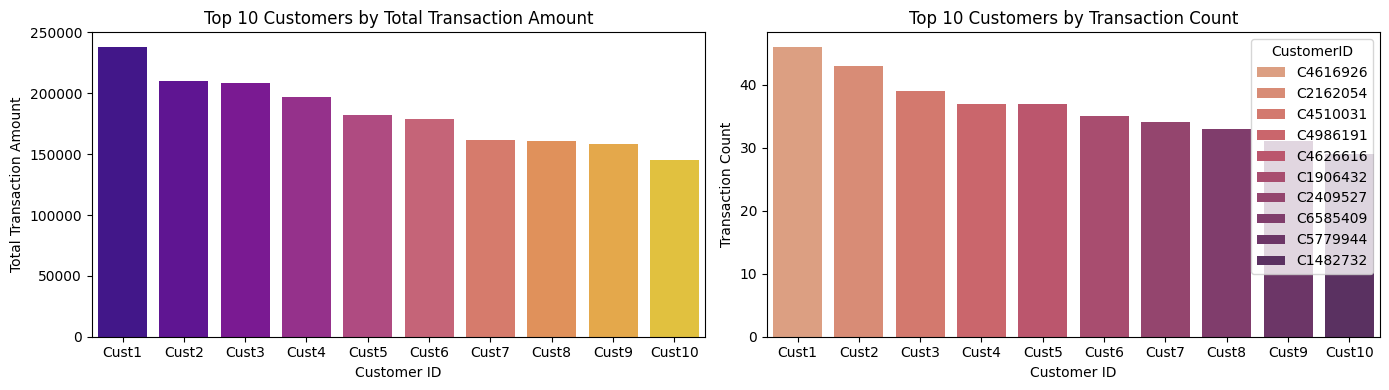

In [179]:
#VISUALIZATION

plt.figure(figsize=(14, 4))

plt.subplot(1,2,1)
top_amount = Top10.head(10)
sns.barplot(x=top_amount.index, y='Total_sum', data=top_amount, hue=top_amount.index, palette='plasma')
plt.title('Top 10 Customers by Total Transaction Amount')
plt.xlabel('Customer ID')
plt.ylabel('Total Transaction Amount')
plt.xticks(range(10), [f'Cust{i+1}'for i in range(10)])

plt.subplot(1,2,2)
top_count = Top10.head(10).sort_values(by='Transaction_count', ascending=False)
sns.barplot(x=top_count.index, y='Transaction_count', data=top_count, hue=top_amount.index, palette='flare')
plt.title('Top 10 Customers by Transaction Count')
plt.xlabel('Customer ID')
plt.ylabel('Transaction Count')
plt.xticks(range(10), [f'Cust{i+1}'for i in range(10)])

plt.tight_layout()
plt.show()

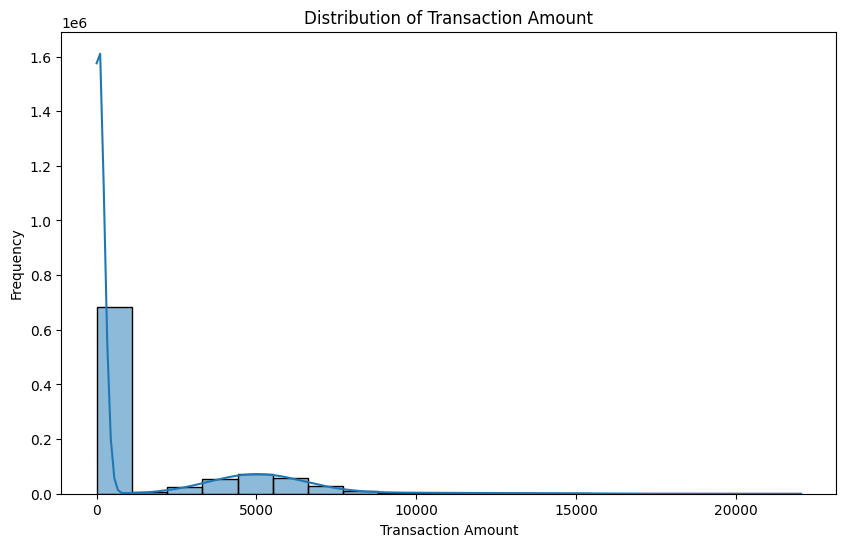

In [180]:
#Visualize Transaction Amount

plt.figure(figsize=(10,6))
sns.histplot(df['TransactionAmount'],bins=20,kde=True)
plt.title('Distribution of Transaction Amount')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show();plt.close()

# **Gender Distribution Analysis**

This section draw an insights from how customer gender influences financial behavior and transanctfion pattern within the datasets. in this phase we aggregate the the number of unique customers, total transaction amount, average transaction amount and Transaction count.

In [181]:
#Gender Distribution Anakysis
print("\n Gender Distribution Analysis:")

gender_dist = df.groupby('CustGender').agg({
    'CustomerID':'unique',
    'TransactionAmount': ['sum', 'mean', 'count'],
    'CustAccountBalance': 'mean'
}).round(2)

gender_dist.columns = ['Unique_Customers', 'Total_Transaction_Amount', 'Average_Transaction_Amount', 'Transaction_Count', 'Average_Account_Balance']

print(gender_dist.head(10))


 Gender Distribution Analysis:
                                             Unique_Customers  \
CustGender                                                      
F           [C1419610, C3341057, C1499914, C4668136, C4903...   
M           [C5614226, C5108603, C4744854, C2719583, C2458...   

            Total_Transaction_Amount  Average_Transaction_Amount  \
CustGender                                                         
F                       7.394790e+08                     1561.54   
M                       7.540077e+08                     1589.53   

            Transaction_Count  Average_Account_Balance  
CustGender                                              
F                      473557                 25816.93  
M                      474360                 25511.62  



##**Visualization of Gender Analysis**



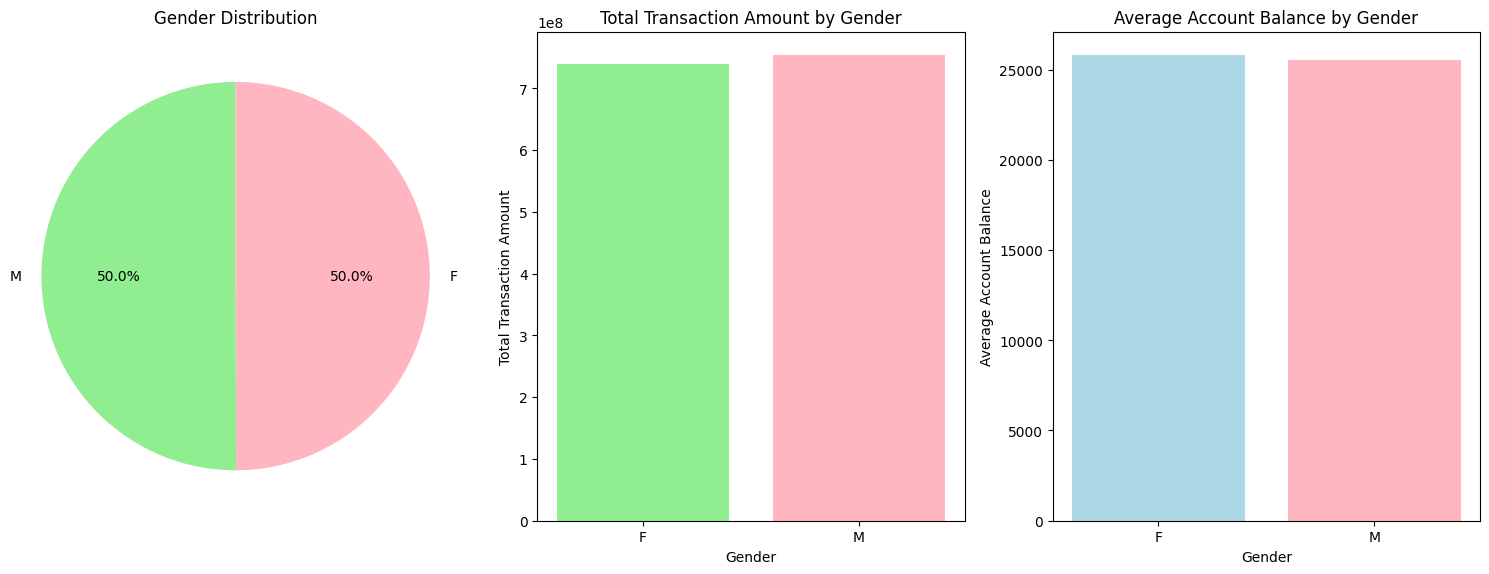

In [182]:
plt.figure(figsize=(15, 6))

plt.subplot(1,3,1)
gender_count = df['CustGender'].value_counts()
plt.pie(gender_count.values, labels=gender_count.index, autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'lightpink'])
plt.title('Gender Distribution')
plt.axis('equal')

plt.subplot(1,3,2)
gender_amount = df.groupby('CustGender')['TransactionAmount'].sum()
plt.bar(gender_amount.index, gender_amount.values, color=['lightgreen', 'lightpink'])
plt.title('Total Transaction Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Transaction Amount')

plt.subplot(1,3,3)
genderavg_balance = df.groupby('CustGender')['CustAccountBalance'].mean()
plt.bar(genderavg_balance.index, genderavg_balance.values, color=['lightblue', 'lightpink'])
plt.title('Average Account Balance by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Account Balance')

plt.tight_layout()
plt.show()

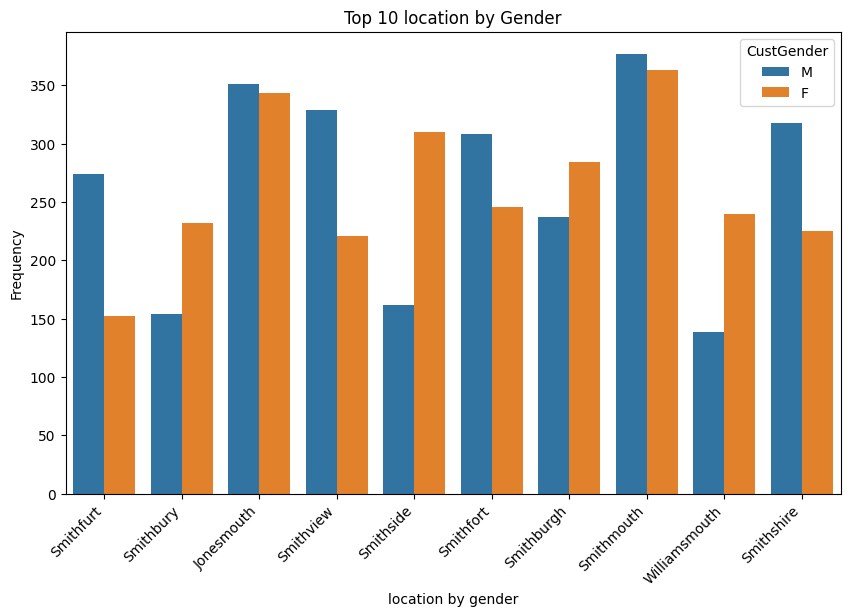

In [214]:

#Top 10 Locations by Gender
plt.figure(figsize=(10,6))
toplocations = df["CustLocation"].value_counts().head(10).index
sns.countplot(data=df[df['CustLocation'].isin(toplocations)], x='CustLocation', hue="CustGender")
plt.title('Top 10 location by Gender')

plt.xticks(rotation=45, ha='right')
plt.xlabel('location by gender')
plt.ylabel('Frequency')
plt.show();plt.close()

# **Location Analysis**

This sections shows a comprehensive location analysis to uncover geographical location and distribution of the customers behavior, financial activity, and spending capacity. this aggregates CustLocation showing the number of unique customers, total and average transaction amounts, trasaction counts, and average account balance.

In [184]:
#Location Analysis
print(f" Location Analysis:")

location_distribution = df.groupby('CustLocation').agg({
    'CustomerID': 'nunique',
    'TransactionAmount': ['sum', 'mean', 'count'],
    'CustAccountBalance': 'mean'
}).round(2)

location_distribution.columns = ['Unique_Customers', 'Total_Tran_Amount', 'Avg_Amount','Transaction_Count', 'Avg_Account_Bal']
location_stats = location_distribution.sort_values('Unique_Customers', ascending=False)

print("Top 10 Location by customer count:")
print(location_stats.head(10))


 Location Analysis:
Top 10 Location by customer count:
              Unique_Customers  Total_Tran_Amount  Avg_Amount  \
CustLocation                                                    
Smithmouth                  61          610531.79      825.04   
Jonesmouth                  51          608588.26      876.93   
Smithfort                   47          515952.69      931.32   
Smithview                   45          657543.52     1195.53   
Smithburgh                  43          768441.27     1474.94   
Smithshire                  39         1222119.89     2250.68   
Smithton                    37          586892.70     1893.20   
Smithfurt                   35          491589.07     1153.96   
Smithside                   34          432057.53      915.38   
Smithbury                   33          550405.83     1425.92   

              Transaction_Count  Avg_Account_Bal  
CustLocation                                      
Smithmouth                  740         26192.95  
Jonesmouth 

## **Visualization of Location Analysis**

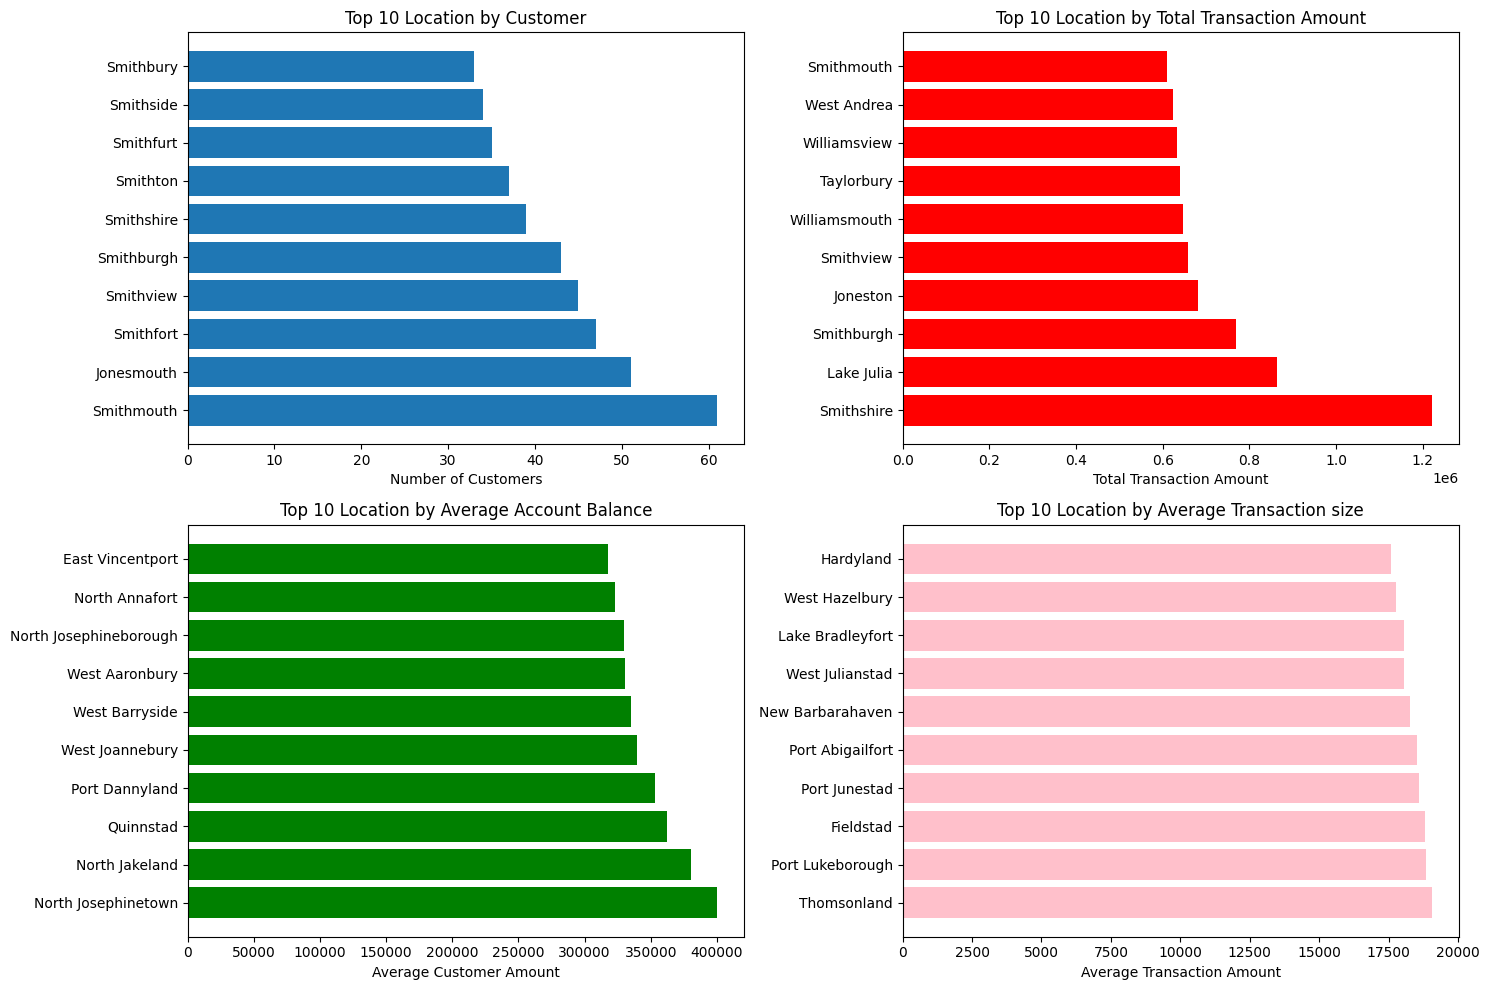

In [185]:
#visualization by location

plt.figure(figsize=(15, 10))

plt.subplot(2,2,1)
top_customer_location= location_stats.head(10)['Unique_Customers']
plt.barh(range(10), top_customer_location.values)
plt.yticks(range(10), top_customer_location.index)
plt.title('Top 10 Location by Customer')
plt.xlabel('Number of Customers')


plt.subplot(2,2,2)
location_top_amount = location_stats.sort_values('Total_Tran_Amount', ascending=False).head(10)['Total_Tran_Amount']
plt.barh(range(10), location_top_amount.values, color='red')
plt.yticks(range(10), location_top_amount.index)
plt.title('Top 10 Location by Total Transaction Amount')
plt.xlabel('Total Transaction Amount')


plt.subplot(2,2,3)
location_avg_amount = location_stats.sort_values('Avg_Account_Bal', ascending=False).head(10)['Avg_Account_Bal']
plt.barh(range(10),location_avg_amount.values, color='green')
plt.yticks(range(10), location_avg_amount.index)
plt.title('Top 10 Location by Average Account Balance')
plt.xlabel('Average Customer Amount')

plt.subplot(2,2,4)
top_location_balance = location_distribution.sort_values(by='Avg_Amount', ascending=False).head(10)['Avg_Amount']
plt.barh(range(10), top_location_balance.values, color='pink')
plt.yticks(range(10), top_location_balance.index)
plt.title('Top 10 Location by Average Transaction size')
plt.xlabel('Average Transaction Amount')

plt.tight_layout()
plt.show()

# ***TEMPORAL ANALYSIS***

# **Customer Behavior Analysis**

This part performs an in-depth Customer Behavior Analysis to understand transaction activity patterns,spending capacity and overall financial engagement among customers. The statistical overview first summarises transaction activity per customer, reporting key indicators such as the average and median number of transactions,

In [186]:
#Customer Behavior Analysis
print(f"CUSTOMER BEHAVIOR ANALYSIS:")

Transactions_per_customer = df.groupby('CustomerID').size()

print(f"Average transactions per customer: {Transactions_per_customer.mean():.2f}")
print(f"Median transactions per customer: {Transactions_per_customer.median():.2f}")
print(f"Most active customer: {Transactions_per_customer.max()} transactions")
print(f"Least active customer: {Transactions_per_customer.min()} transactions")

CUSTOMER BEHAVIOR ANALYSIS:
Average transactions per customer: 11.56
Median transactions per customer: 12.00
Most active customer: 53 transactions
Least active customer: 1 transactions


**Customer Segmentation by Activity**

Customers are then categorised into activity segments One-Time, Occasional, Regular, and Frequent to highlight engagement intensity across the user base.

In [187]:
activity_seg = pd.cut(Transactions_per_customer,
                      bins=[0, 1, 5, 15, float('inf')],
                      labels=['one-time', 'Occasional','Regular','Frequent'])

print("\n Customer Segmentation by Activity:")
print(activity_seg.value_counts().sort_index())


 Customer Segmentation by Activity:
one-time       8921
Occasional    23454
Regular       18867
Frequent      30758
Name: count, dtype: int64


**Balance Segments**

The account balances are segmented into financial tiers (Very Low, Low, Medium, High, and Very High), allowing for insights into economic diversity and customer wealth distribution.

In [188]:
bal_segments=pd.cut(df['CustAccountBalance'],
                    bins=[0, 1000, 5000, 20000, 50000, float('inf')],
                    labels=['Very low','Low','Medium','High','Very High'])

df['bal_segments'] = bal_segments

print("\n Account Balance Segments:")
print(bal_segments.value_counts().sort_index())


 Account Balance Segments:
CustAccountBalance
Very low      66446
Low          160873
Medium       276284
High         201955
Very High    153435
Name: count, dtype: int64


## **Visualization of Customer Segments**

The visualisations further clarify these dynamics:

The first bar chart displays customer distribution
across activity segments, revealing how transaction frequency varies within the customer pool.

The second chart presents the distribution of customers across account balance levels, highlighting financial stratification.

The third heatmap visualises correlations among key numerical features such as transaction amount, balance, and transaction time — providing clues about behavioural interdependencies.


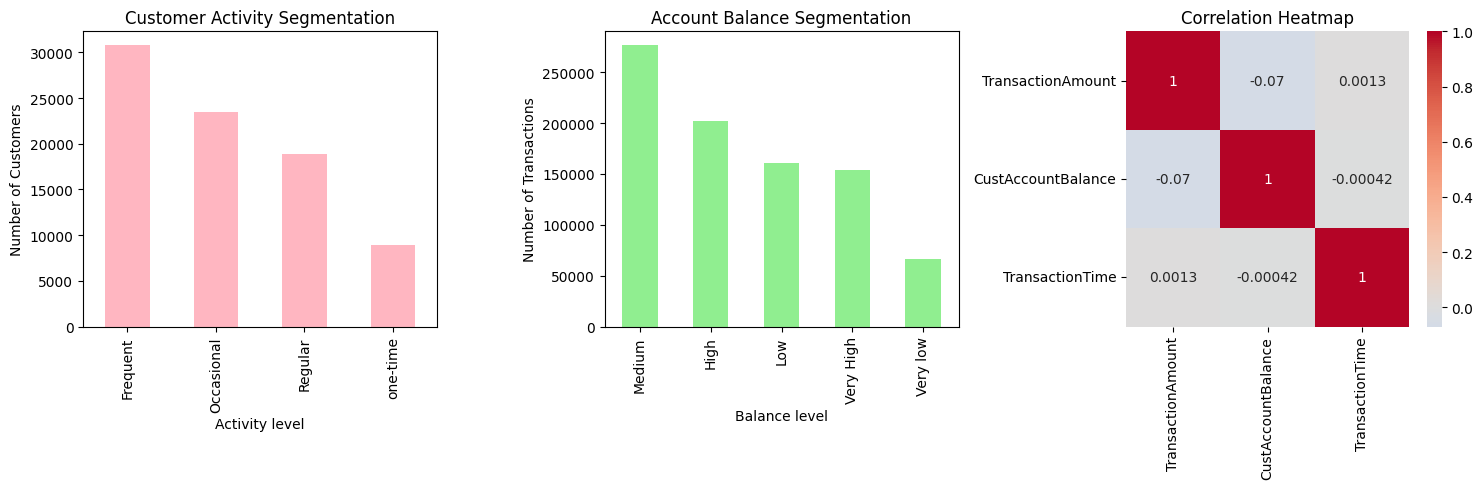

In [189]:
plt.figure(figsize = (15, 5))

plt.subplot(1,3,1)
activity_seg.value_counts().plot(kind='bar', color ='lightpink')
plt.title('Customer Activity Segmentation')
plt.xlabel('Activity level')
plt.ylabel('Number of Customers')

plt.subplot(1,3,2)
df['bal_segments'].value_counts().plot(kind='bar', color ='lightgreen')
plt.title('Account Balance Segmentation')
plt.xlabel('Balance level')
plt.ylabel('Number of Transactions')

#correlation heatmap for numerical variables
plt.subplot(1,3,3)
corr_matrix = df[['TransactionAmount', 'CustAccountBalance', 'TransactionTime']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center= 0)
plt.title('Correlation Heatmap')

plt.tight_layout()
plt.show()


## **3. FEATURE ENGINEERING** (RFM Metrics)

Setting the Reference Date: Defines the reference date as one day after the most recent transaction. This date is used to calculate how recently each customer made a purchase.


In [190]:
print("\n"+"="*50)

# convert TransactionDate column to datetime
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])

#set reference date(day after last transaction)
reference_date = df['TransactionDate'].max() + pd.Timedelta(days=1)
print(f"Refrence date for Recency calculation: {reference_date.date()}")


Refrence date for Recency calculation: 2023-01-01


**Calculate RFM Metrics for each customer**

Computing RFM Metrics: Aggregates data by CustomerID and calculates three key metrics:

Recency: The number of days since the customer’s last purchase (reference_date - last_transaction_date).

Frequency: The total number of transactions made by the customer.

Monetary: The total amount spent by the customer.
The resulting dataframe (rfm_df) summarises these metrics for each unique customer.


In [191]:
#Calculate RFM Metrics for each customer

rfm_df = df.groupby('CustomerID').agg({
    'TransactionDate': lambda x: (reference_date - x.max()).days,
    'TransactionID': 'count',
    'TransactionAmount': 'sum'
}).reset_index()

rfm_df.columns= ['CustomerID', 'Recency','Frequency', 'Monetary']

print(f"RFM dataframe shape:{rfm_df.shape}")
print(rfm_df.head())

RFM dataframe shape:(82000, 4)
  CustomerID  Recency  Frequency  Monetary
0   C1000107     1040          1     96.41
1   C1000111        8         19    989.46
2   C1000159      106         16    758.07
3   C1000852      178         26   1455.31
4   C1000896       56         14  65914.10


**Adding Customer demography to RFM**

1. Adding Customer Demographics group customer demographic attributes (such as date of birth, gender, location, and account balance) by their customer ID  into the RFM dataframe for enriched analysis.



In [192]:

#Adding customer demography to RFM
customer_dem = df.groupby('CustomerID').agg({
    'CustomerDOB': 'first',
    'CustGender': 'first',
    'CustLocation': 'first',
    'CustAccountBalance':'last'
}).reset_index()

customer_dem.head()


,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance
0,C1000107,2001-06-27,F,South Josh,1150.66
1,C1000111,1952-11-18,M,New Peter,52895.11
2,C1000159,1988-07-23,M,Lake Duncanburgh,3006.98
3,C1000852,1985-10-06,M,Thomasborough,11922.49
4,C1000896,1945-04-10,M,East Kim,43815.21


2. RFM Summary Statistics Prints summary statistics (mean, min, max, quartiles, etc.) for the Recency, Frequency, and Monetary columns, giving an overview of customer distribution and spending behaviour.
5. Displaying Sample Data Shows the first 10 rows of the final RFM dataframe for verification and inspection.

In [193]:
rfm_df = rfm_df.merge( customer_dem, on='CustomerID', how='left')

print(f"RFM Metric Summary:")
print(rfm_df[['Recency', 'Frequency', 'Monetary']].describe())


print("\nFirst 10 rows of RFM data:")
display(rfm_df.head(10))

RFM Metric Summary:
            Recency     Frequency       Monetary
count  82000.000000  82000.000000   82000.000000
mean     183.215805     11.559963   18213.252287
std      233.969112      8.741243   32040.394102
min        1.000000      1.000000       1.620000
25%       30.000000      3.000000     766.730000
50%       83.000000     12.000000    1146.350000
75%      236.000000     19.000000   18866.992500
max     1096.000000     53.000000  238187.910000

First 10 rows of RFM data:


,CustomerID,Recency,Frequency,Monetary,CustomerDOB,CustGender,CustLocation,CustAccountBalance
0,C1000107,1040,1,96.41,2001-06-27,F,South Josh,1150.66
1,C1000111,8,19,989.46,1952-11-18,M,New Peter,52895.11
2,C1000159,106,16,758.07,1988-07-23,M,Lake Duncanburgh,3006.98
3,C1000852,178,26,1455.31,1985-10-06,M,Thomasborough,11922.49
4,C1000896,56,14,65914.10,1945-04-10,M,East Kim,43815.21
5,C1000976,72,19,1064.70,2003-06-24,F,New Nigelville,1660.27
6,C1001005,246,13,670.30,1960-10-12,F,New Frances,51131.84
7,C1001021,458,1,4080.97,1987-06-26,M,Roseland,512.70
8,C1001094,88,20,102052.01,1999-12-16,F,West Reeceborough,0.00
9,C1001172,642,1,7376.57,2002-05-29,F,Brownchester,5539.94


## RFM Scoring and Customer Segmentation

3.1	RFM Scoring and Customer Segmentation
This section focuses on converting the calculated RFM metrics into standardised scores and combining them to segment customers based on behaviour and value.
1. Creating RFM Scores. Each RFM metric is converted into a 1–5 scale using pd.qcut, which divides data into five equal groups (quintiles):
Recency (R_Score): Customers who purchased more recently get higher scores (5 = most recent, 1 = least recent).
Frequency (F_Score): Customers with more transactions receive higher scores (5 = most frequent).
Monetary (M_Score): Customers who spent more get higher scores (5 = highest spenders).
2. Converting Scores to Numeric Format All RFM score columns are converted to integer types for mathematical operations and easier manipulation.
3. Combining Scores Two additional fields are created:
RFM_Score: The sum of all three scores, providing a total behavioural score.
RFM_Group: A concatenated string representation (e.g., "543") for easier segment identification.
4. RFM Scoring Summary and Distribution Summary statistics and value counts are displayed for each score to visualise the distribution and ensure the scoring is balanced across customers.


In [194]:
print("\n" + "="*50)
print("RFM SCORING AND SEGMENTATION")
print("="*50)

#Create RFM Scores (1-5 scale)

#Recency: lower recency = better(more recent)
rfm_df['R_score'] = pd.qcut(rfm_df['Recency'], q=5, labels=[5, 4, 3, 2, 1])

#Frequency: higher frequency = better
rfm_df['F_score'] = pd.qcut(rfm_df['Frequency'], q=5, labels=[1, 2, 3, 4, 5])

#Monetary:Higher monetary = better
rfm_df['M_score'] = pd.qcut(rfm_df['Monetary'], q=5, labels=[1, 2, 3, 4, 5])

#Convert scores to numeric
rfm_df['R_score'] = rfm_df['R_score'].astype(int)
rfm_df['F_score'] = rfm_df['F_score'].astype(int)
rfm_df['M_score'] = rfm_df['M_score'].astype(int)

#Create RFM combined score
rfm_df['RFM_Score'] = rfm_df['R_score'] + rfm_df['F_score']  + rfm_df['M_score']

rfm_df['RFM_Group'] = rfm_df['R_score'].astype(str) + rfm_df['F_score'].astype(str) + rfm_df['M_score'].astype(str)

print("RFM Score Summary:")
print(rfm_df[['R_score', 'F_score', 'M_score']].describe())


RFM SCORING AND SEGMENTATION
RFM Score Summary:
            R_score       F_score       M_score
count  82000.000000  82000.000000  82000.000000
mean       3.008793      2.871939      2.999988
std        1.418599      1.406467      1.414218
min        1.000000      1.000000      1.000000
25%        2.000000      2.000000      2.000000
50%        3.000000      3.000000      3.000000
75%        4.000000      4.000000      4.000000
max        5.000000      5.000000      5.000000


In [195]:
#Display Score Distribution
print("\nRFM Score Distribution:")
print("R_Score Distribution")
print(rfm_df['R_score'].value_counts().sort_index())

print("\nF_Score Distribution")
print(rfm_df['F_score'].value_counts().sort_index())

print("\nM_Score Distribution")
print(rfm_df['M_score'].value_counts().sort_index())



RFM Score Distribution:
R_Score Distribution
R_score
1    16364
2    16338
3    16232
4    16345
5    16721
Name: count, dtype: int64

F_Score Distribution
F_score
1    17901
2    19390
3    13951
4    16825
5    13933
Name: count, dtype: int64

M_Score Distribution
M_score
1    16400
2    16400
3    16401
4    16399
5    16400
Name: count, dtype: int64


In [196]:
rfm_df.head(10)

,CustomerID,Recency,Frequency,Monetary,CustomerDOB,CustGender,CustLocation,CustAccountBalance,R_score,F_score,M_score,RFM_Score,RFM_Group
0,C1000107,1040,1,96.41,2001-06-27,F,South Josh,1150.66,1,1,1,3,111
1,C1000111,8,19,989.46,1952-11-18,M,New Peter,52895.11,5,4,2,11,542
2,C1000159,106,16,758.07,1988-07-23,M,Lake Duncanburgh,3006.98,3,4,2,9,342
3,C1000852,178,26,1455.31,1985-10-06,M,Thomasborough,11922.49,2,5,4,11,254
4,C1000896,56,14,65914.10,1945-04-10,M,East Kim,43815.21,4,3,5,12,435
5,C1000976,72,19,1064.70,2003-06-24,F,New Nigelville,1660.27,3,4,3,10,343
6,C1001005,246,13,670.30,1960-10-12,F,New Frances,51131.84,2,3,1,6,231
7,C1001021,458,1,4080.97,1987-06-26,M,Roseland,512.70,1,1,4,6,114
8,C1001094,88,20,102052.01,1999-12-16,F,West Reeceborough,0.00,3,4,5,12,345
9,C1001172,642,1,7376.57,2002-05-29,F,Brownchester,5539.94,1,1,4,6,114


array([[<Axes: title={'center': 'Recency'}>,
        <Axes: title={'center': 'Frequency'}>,
        <Axes: title={'center': 'Monetary'}>],
       [<Axes: title={'center': 'CustAccountBalance'}>,
        <Axes: title={'center': 'R_score'}>,
        <Axes: title={'center': 'F_score'}>],
       [<Axes: title={'center': 'M_score'}>,
        <Axes: title={'center': 'RFM_Score'}>, <Axes: >]], dtype=object)

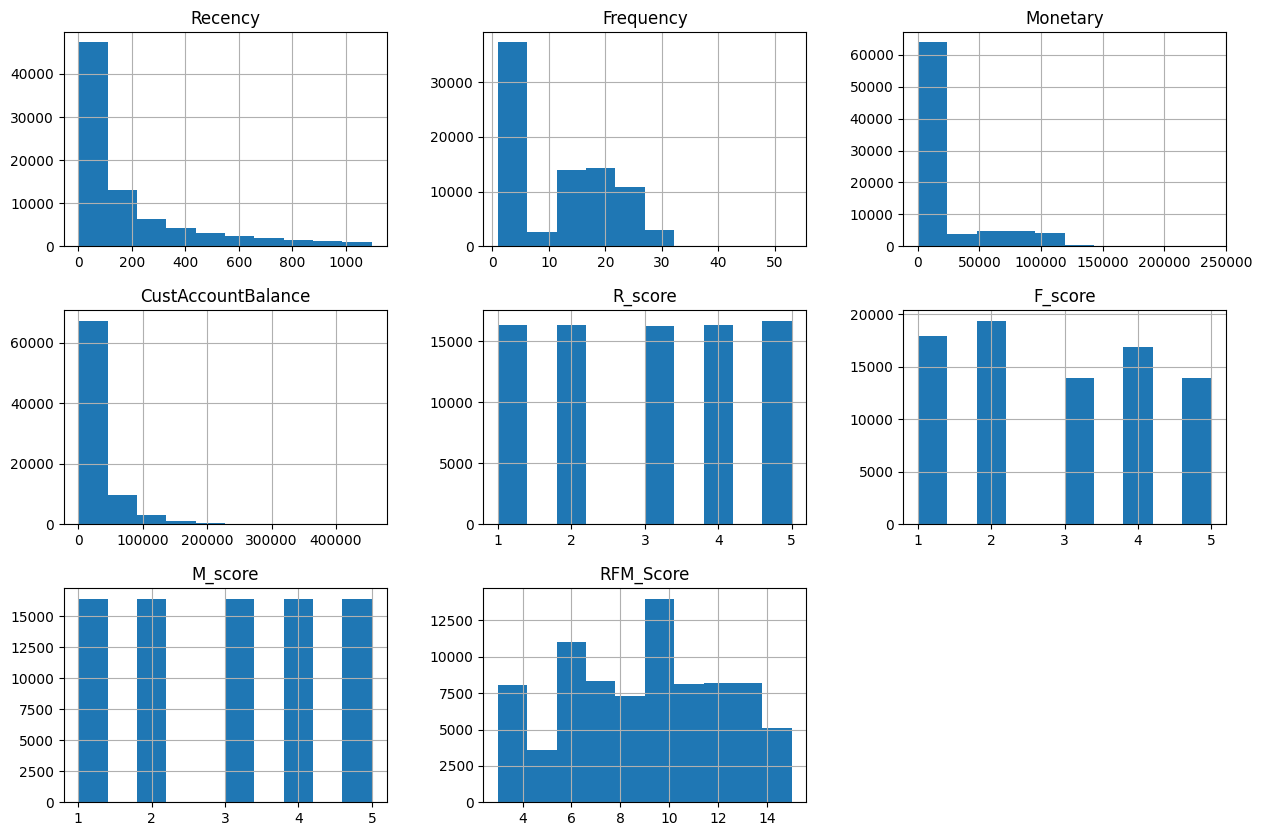

In [197]:
rfm_df.hist(figsize=(15, 10))



# **K-MEANS CLUSTERING PREPARATION FOR RFM ANALYSIS**

In [198]:
from sklearn.preprocessing import StandardScaler
import numpy as np

**Determine the Optimal number of Clusters**

This section prepares the RFM dataset for clustering analysis using the K-Means algorithm by transforming, scaling, and structuring the data to ensure optimal performance and accurate segmentation.
1. Selecting Relevant Features Only the key RFM metrics — Recency, Frequency, and Monetary — are extracted for clustering since they represent customer engagement and value patterns.
2. Handling Skewness with Log Transformation. Transaction data often exhibits right-skewed distributions (a few customers spend or purchase far more than others). To stabilise variance and reduce skewness, a log(1 + x) transformation is applied to each metric. This transformation makes the data more normally distributed, improving clustering quality.



array([[<Axes: title={'center': 'Recency'}>,
        <Axes: title={'center': 'Frequency'}>],
       [<Axes: title={'center': 'Monetary'}>, <Axes: >]], dtype=object)

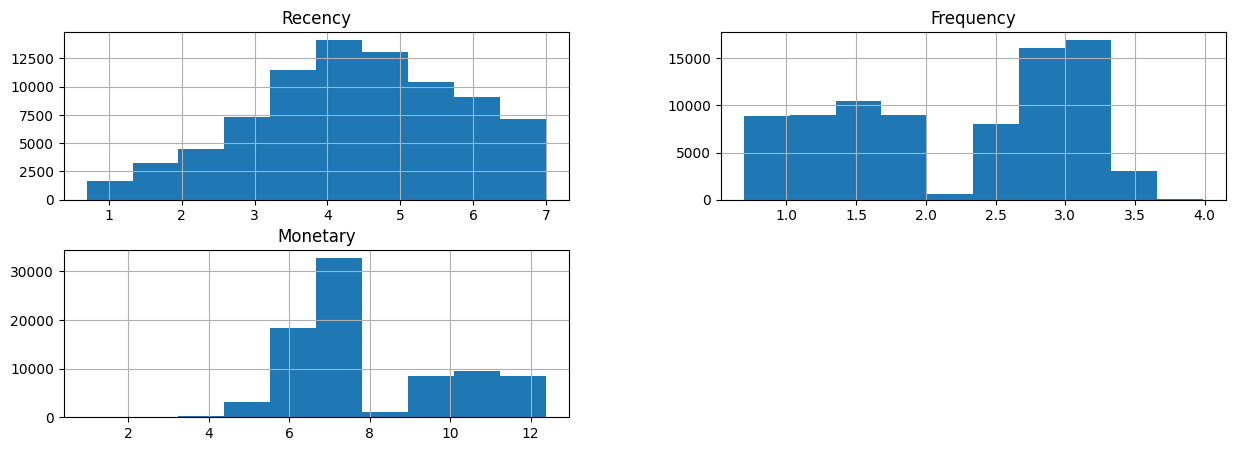

In [199]:

#prepare data for clustering
rfm_clustering = rfm_df[['Recency', 'Frequency', 'Monetary']].copy()


#Handle Skewness with log transformation
rfm_clustering['Recency'] = np.log1p(rfm_clustering['Recency'])
rfm_clustering['Frequency'] = np.log1p(rfm_clustering['Frequency'])
rfm_clustering['Monetary'] = np.log1p(rfm_clustering['Monetary'])


rfm_clustering.hist(figsize=(15, 5))


1. Standardising the Features K-Means is sensitive to the scale of features. Therefore, each transformed variable is standardised using StandardScaler, which rescales data to have zero mean and unit variance. This ensures that all features contribute equally to the clustering process, preventing large-scale variables (like Monetary) from dominating the algorithm.

2.Final Output The processed dataset (rfm_scaled_df) is ready for clustering and contains the standardised Recency, Frequency, and Monetary values suitable for input into the K-Means model.

In [200]:
#Standardize the Feature (Scaling)
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_clustering)
rfm_scaled_df = pd.DataFrame(rfm_scaled, columns=['Recency', 'Frequency', 'Monetary'])

print("Data prepared for clustering(scaled and transformed)")
print(rfm_scaled_df)

Data prepared for clustering(scaled and transformed)
        Recency  Frequency  Monetary
0      1.803285  -1.674215 -1.719173
1     -1.540152   0.894174 -0.539368
2      0.202119   0.712894 -0.674721
3      0.564251   1.228922 -0.343267
4     -0.241104   0.573283  1.596145
...         ...        ...       ...
81995 -0.305716   0.894174  1.738349
81996  0.548346  -1.221944 -1.047708
81997  0.227948   0.836959 -0.578470
81998  1.086596  -0.901053 -0.774309
81999 -0.319382   1.308630 -0.351330

[82000 rows x 3 columns]


This section identifies the most appropriate number of clusters (k) for segmenting customers based on their RFM features. Choosing the right number of clusters is essential for meaningful and interpretable customer segmentation.
1. Elbow Method (WCSS Analysis) The Elbow Method evaluates the Within-Cluster Sum of Squares (WCSS) for different values of k.
As k increases, WCSS decreases since more clusters mean tighter groups.
The optimal k is typically found at the “elbow point” — where the rate of decrease in WCSS sharply slows down. This point balances compactness (low WCSS) with simplicity (fewer clusters).
2. Silhouette Score Evaluation The Silhouette Score measures how similar each data point is to its assigned cluster compared to other clusters.
Scores range from -1 to 1, where values closer to 1 indicate well-separated, cohesive clusters.
By calculating silhouette scores for each k, the optimal number of clusters corresponds to the highest score, ensuring well-defined segment boundaries.
3. Visualization of Results Two plots are generated for comparison:
Elbow Plot: Displays WCSS against the number of clusters.
Silhouette Plot: Displays silhouette scores across different values of k. These visuals help confirm the best balance between model simplicity and segmentation accuracy.
4. Selecting the Optimal k The script automatically selects the number of clusters with the highest silhouette score as the optimal k, ensuring statistically sound and interpretable clustering performance.



===DETERMINE THE NUMBER OF CLUSTERS===

=== DETERMINE THE NUMBER OF CLUSTERS ===


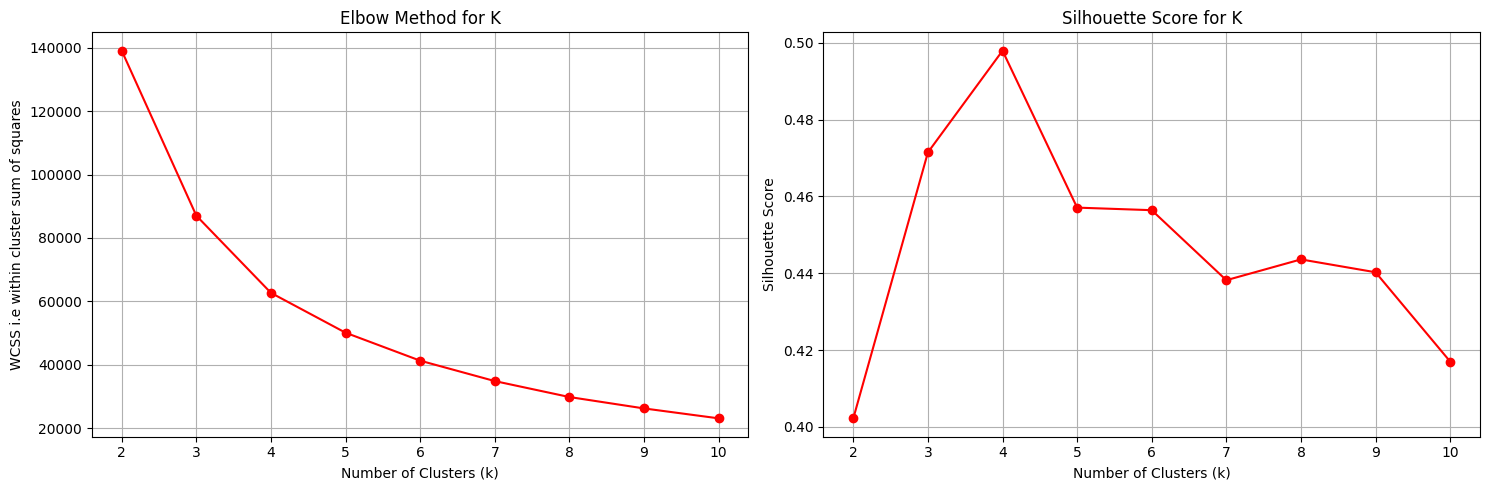

Optimal number of clusters based on silhouette score: 4
Best silhouette score: 0.4979


In [213]:
 #Determine the number of Cluster
print("\n===DETERMINE THE NUMBER OF CLUSTERS===")

#ELBOW METHOD
print("\n=== DETERMINE THE NUMBER OF CLUSTERS ===")

WCSS = []
silhouette_scores = []
cluster_range = range(2, 11)  # try k = 2..10

for k in cluster_range:
    kmeans_model = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_model.fit_predict(rfm_scaled_df)

    # Elbow: inertia
    WCSS.append(kmeans_model.inertia_)

    # Silhouette score (valid for k >= 2; our range already starts at 2)
    #if k > 1:
    score = silhouette_score(
        rfm_scaled_df,
        kmeans_model.labels_
    )
    silhouette_scores.append(score)

#Plot Elbow Method and Silhouette
plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
plt.plot(cluster_range, WCSS, marker='o', color='red')
plt.title('Elbow Method for K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS i.e within cluster sum of squares')
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(cluster_range, silhouette_scores, marker='o', color='red')
plt.title('Silhouette Score for K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)

plt.tight_layout()
plt.show()

#Find optimal k based on silhoutte score
optimal_k = cluster_range[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters based on silhouette score: {optimal_k}")
print(f"Best silhouette score: {max(silhouette_scores):.4f}")

##APPLYING K-MEANS CLUSTERING AND CUSTOMER SEGMENTATION


Applying K-Means Clustering Using the optimal number of clusters (optimal_k) determined earlier, the K-Means algorithm is fitted on the scaled RFM dataset. Each customer is assigned to a cluster based on their RFM profile, capturing behavioural similarities such as purchase recency, transaction frequency, and total spending. The results are stored in a new column, Cluster, within the rfm_df DataFrame.


In [202]:
#APPLYING K-MEANS CLUSTERING

print(f"===APPLYING K-MEANS WITH {optimal_k} CLUSTERINGn===")
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
rfm_df['Cluster'] = kmeans.fit_predict(rfm_scaled_df)
rfm_df.head()

===APPLYING K-MEANS WITH 4 CLUSTERINGn===


,CustomerID,Recency,Frequency,Monetary,CustomerDOB,CustGender,CustLocation,CustAccountBalance,R_score,F_score,M_score,RFM_Score,RFM_Group,Cluster
0,C1000107,1040,1,96.41,2001-06-27,F,South Josh,1150.66,1,1,1,3,111,3
1,C1000111,8,19,989.46,1952-11-18,M,New Peter,52895.11,5,4,2,11,542,1
2,C1000159,106,16,758.07,1988-07-23,M,Lake Duncanburgh,3006.98,3,4,2,9,342,1
3,C1000852,178,26,1455.31,1985-10-06,M,Thomasborough,11922.49,2,5,4,11,254,1
4,C1000896,56,14,65914.10,1945-04-10,M,East Kim,43815.21,4,3,5,12,435,0


Cluster Analysis and Summary Statistics After clustering, a detailed aggregate analysis is performed for each cluster to understand its behavioural characteristics. The following metrics are computed for each cluster:

*   Average Recency, Frequency, and Monetary values.
*   Mean RFM component scores (R_Score, F_Score, M_Score).
*  Customer count (Count) within each cluster.
*  Average account balance (Avg_Account_Balance).
*  Most common gender (Most_Common_Gender).
This analysis provides a clear overview of how different customer segments behave and what distinguishes them.


In [203]:
#ANALYZE CLUSTERS

cluster_analysis = rfm_df.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'R_score': 'mean',
    'F_score': 'mean',
    'M_score': 'mean',
    'CustomerID': 'count',
    'CustAccountBalance': 'mean',
    'CustGender': lambda x: x.mode()[0] if len(x.mode()) > 0 else 'Unknown'

}).round(2)

cluster_analysis.columns = ['Avg_Recency', 'Avg_Frequency', 'Avg_Monetary',
                            'Avg_R_score', 'Avg_F_score', 'Avg_M_score',
                            'Customer_Count', 'Avg_Account_Balance', 'Most_Common_Gender'
                            ]


print("Cluster Analysis:")
display(cluster_analysis)

Cluster Analysis:


,Avg_Recency,Avg_Frequency,Avg_Monetary,Avg_R_score,Avg_F_score,Avg_M_score,Customer_Count,Avg_Account_Balance,Most_Common_Gender
Cluster,,,,,,,,,
0,65.94,16.02,79876.94,3.72,3.64,4.98,15384,16342.05,M
1,50.22,18.74,1012.16,3.95,3.99,2.52,31938,27359.23,F
2,435.37,1.81,17882.34,1.64,1.20,4.11,12134,24737.52,M
3,315.94,3.59,680.85,1.92,1.67,1.74,22544,28086.71,M


In [204]:
rfm_df['Cluster'].value_counts()

,count
Cluster,
1,31938
3,22544
0,15384
2,12134


Assigning Descriptive Cluster Names . To make interpretation intuitive, clusters are automatically labelled based on their RFM patterns and spending activity:

**High-Value Dormant Customers**: High spenders who haven’t purchased in over a year.

**Dormant Low-Value Customers:** Low spenders with no recent activity.

**High-Value Inactive Customers:** High-value customers inactive for 6–12 months.

**Inactive Low-Value Customers:** Low-spending customers inactive for months.

**Active VIP Customers:** Frequently purchasing, high-spending customers.

Active Low-Value Customers:Regularly active but low spenders.

**Regular Customers:** Moderate in both spending and activity.

This step translates raw cluster indices into business-friendly customer segments, facilitating strategic actions such as re-engagement campaigns or loyalty programs.


In [205]:
#REDIFINED CLUSTER NAMING BASED ON RECENCY FIRST

def assign_cluster_name(stats):
    recency = stats['Avg_Recency']
    frequency = stats['Avg_Frequency']
    monetary = stats['Avg_Monetary']

    # 1) Long-dormant customers
    if recency > 365:
        # Haven't purchased in a year
        if monetary > 20000:
            return "High-value Dormant Customers"
        else:
            return "Dormant Low-value Customers"

    # 2) Inactive (6–12 months)
    elif recency > 180:
        # Haven't purchased in 6–12 months
        if monetary > 20000:
            return "High-value Inactive Customers"
        else:
            return "Inactive Low-value Customers"

    # 3) More recent customers (recency <= 180)
    else:
        if frequency > 10 and monetary > 30000:
            return "Active VIP Customers"
        elif frequency > 8 and monetary < 10000:
            return "Active Low-value Customers"
        else:
            return "Regular Customers"
rfm_df['Cluster_Name'] = rfm_df['Cluster'].map(lambda x: assign_cluster_name(cluster_analysis.loc[x]))

In [206]:
#Cluster Distribution
print(f"Final Cluster Distribution:")
cluster_distribution = rfm_df['Cluster_Name'].value_counts()
print(cluster_distribution)

Final Cluster Distribution:
Cluster_Name
Active Low-value Customers      31938
Inactive Low-value Customers    22544
Active VIP Customers            15384
Dormant Low-value Customers     12134
Name: count, dtype: int64


# Customer Segmentation Visualization and Cluster Profiling

**Cluster Profile Generation** The first step computes summary statistics for each customer segment (Cluster_Name) using the RFM dataset. The following metrics are aggregated:
Recency, Frequency, and Monetary: Mean and standard deviation to capture both central tendency and variation within clusters.

Customer_Count: Number of customers per cluster.

Avg_Account_Balance: Average account balance for customers in each group.

Additionally, a Percentage column is calculated to show each segment’s share of the total customer base.
This statistical summary provides the foundation for quantitative comparison between clusters.


In [207]:
#Generate cluster profiles from rfm_df
cluster_profiles = rfm_df.groupby('Cluster_Name').agg({
    'Recency': ['mean', 'std'],
    'Frequency': ['mean', 'std'],
    'Monetary': ['mean', 'std'],
    'CustomerID': 'count',
    'CustAccountBalance': 'mean'
}).round(2)

#Flatten Columns
cluster_profiles.columns = ['_'.join(col).strip() for col in cluster_profiles.columns.values]
cluster_profiles = cluster_profiles.rename(columns={
    'Recency_mean': 'Avg_Recency', 'Recency_std': 'Std_Recency',
    'Frequency_mean': 'Avg_Frequency', 'Frequency_std': 'Std_Frequency',
    'Monetary_mean': 'Avg_Monetary', 'Monetary_std': 'Std_Monetary',
    'CustomerID_count': 'Customer_Count', 'CustAccountBalance_mean': 'Avg_Account_Balance'
})
cluster_profiles['Percentage'] = (cluster_profiles['Customer_Count']/len(rfm_df)*100).round(2)


print("Cluster Profiles successfully created:")
display(cluster_profiles)

Cluster Profiles successfully created:


,Avg_Recency,Std_Recency,Avg_Frequency,Std_Frequency,Avg_Monetary,Std_Monetary,Customer_Count,Avg_Account_Balance,Percentage
Cluster_Name,,,,,,,,,
Active Low-value Customers,50.22,48.00,18.74,6.28,1012.16,289.80,31938,27359.23,38.95
Active VIP Customers,65.94,64.85,16.02,4.79,79876.94,23379.09,15384,16342.05,18.76
Dormant Low-value Customers,435.37,292.04,1.81,0.88,17882.34,8556.07,12134,24737.52,14.80
Inactive Low-value Customers,315.94,246.57,3.59,2.15,680.85,371.00,22544,28086.71,27.49


**Customer Distribution Pie Chart** A pie chart visualises the overall distribution of customers across all defined segments. Each slice represents a distinct cluster, with labels showing both the percentage and absolute number of customers. The chart gives an immediate overview of how the customer base is divided among behavioural groups, highlighting dominant and niche segments. Distinct color schemes and slight explosion effects improve clarity and emphasis.


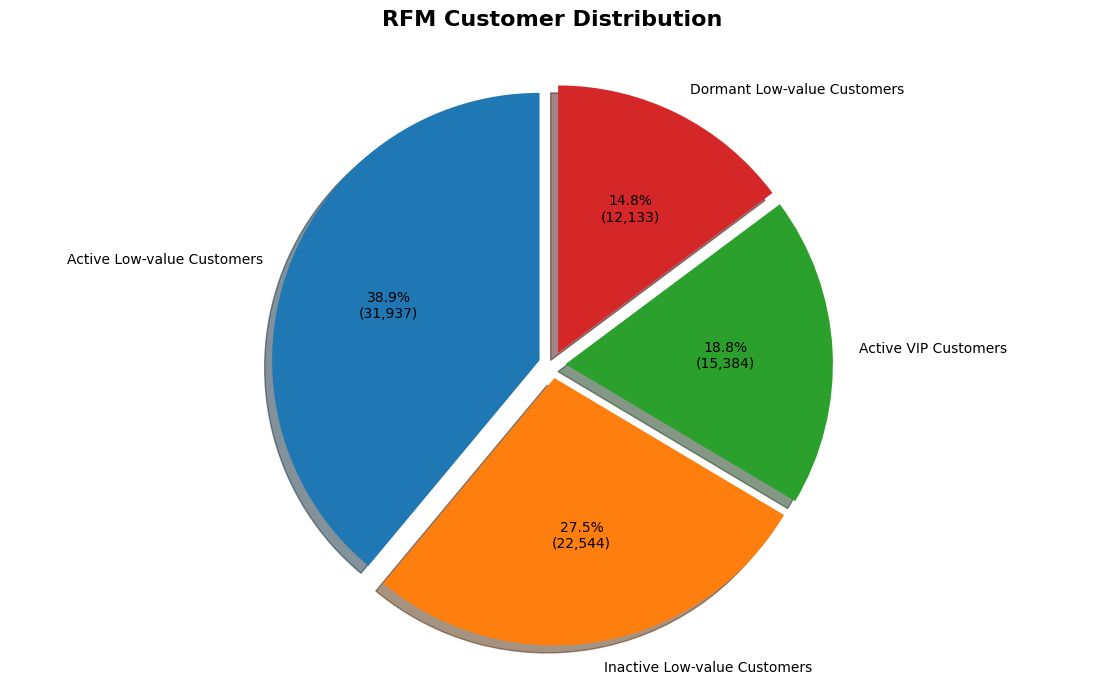

In [208]:
 # COLORS

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

# Big Pie Chart for customer Distribution
segments_counts = rfm_df['Cluster_Name'].value_counts()

plt.figure(figsize=(14, 8))
explode = [0.05] * len(segments_counts)

plt.pie(
    segments_counts.values,
    labels=segments_counts.index,
    autopct=lambda p: f'{p:.1f}%\n({int(p * sum(segments_counts.values) / 100):,})',
    startangle=90,
    colors=colors[:len(segments_counts)],
    explode=explode,
    shadow=True
)

plt.title('RFM Customer Distribution\n', fontsize=16, fontweight='bold')
plt.axis('equal')
plt.show()


**Average RFM Values by Segmen**t (Bar Chart) A grouped bar chart illustrates the average Recency, Frequency, and Monetary values across clusters:

Recency reflects how recently customers purchased.

Frequency indicates purchase activity level.

Monetary (scaled in thousands) represents total spending.

This comparison helps identify which segments are the most active or valuable, providing actionable insight into engagement strategies.


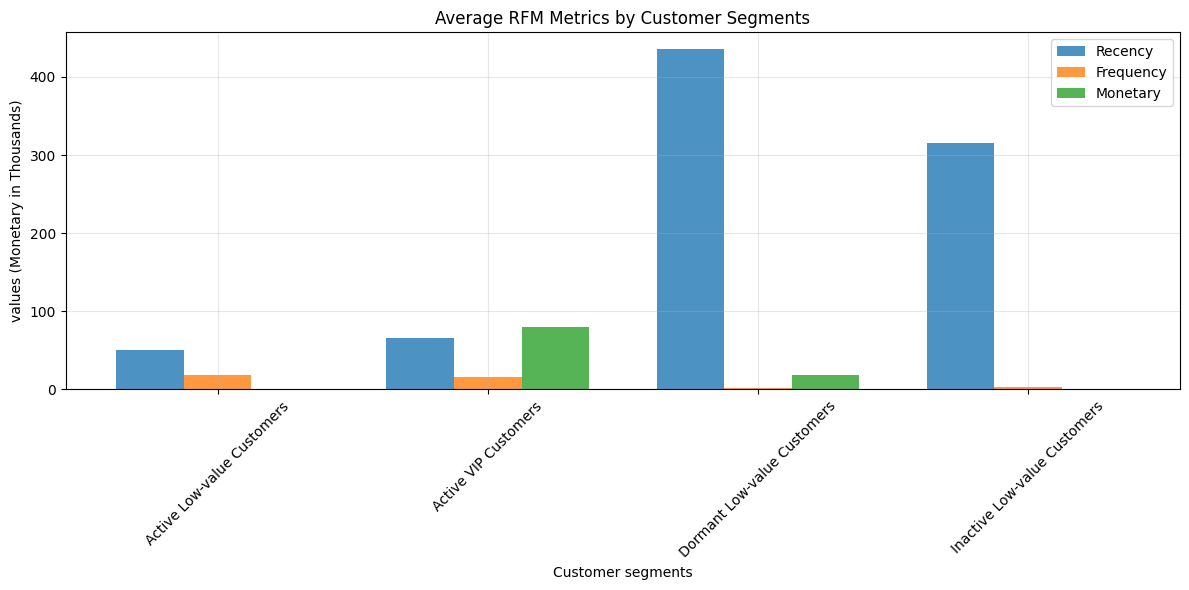

In [209]:
#Bar Chart . Average RFM by segment

plt.figure(figsize=(12, 6))
rfm_metrics = ['Avg_Recency', 'Avg_Frequency', 'Avg_Monetary']
x_pos = np.arange(len(cluster_profiles))
width = 0.25

for i, metric in enumerate(rfm_metrics):
  values = cluster_profiles[metric].values
  if metric == 'Avg_Monetary':
    values = values / 1000   # Thousands
  plt.bar(x_pos + i * width, values, width=width, label=metric.replace('Avg_',''), alpha=0.8)

plt.xlabel('Customer segments')
plt.ylabel('values (Monetary in Thousands)')
plt.title('Average RFM Metrics by Customer Segments')
plt.xticks(x_pos + width, cluster_profiles.index, rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

**Segment Size Comparison** (Horizontal Bar Chart) A horizontal bar chart ranks customer segments by their population size. It visually compares the number of customers per cluster, helping to identify:

Large, general segments represent the majority of the customer base.

Smaller, specialised segments like high-value or dormant customers.

Labels on each bar display exact counts for readability and quick reference.

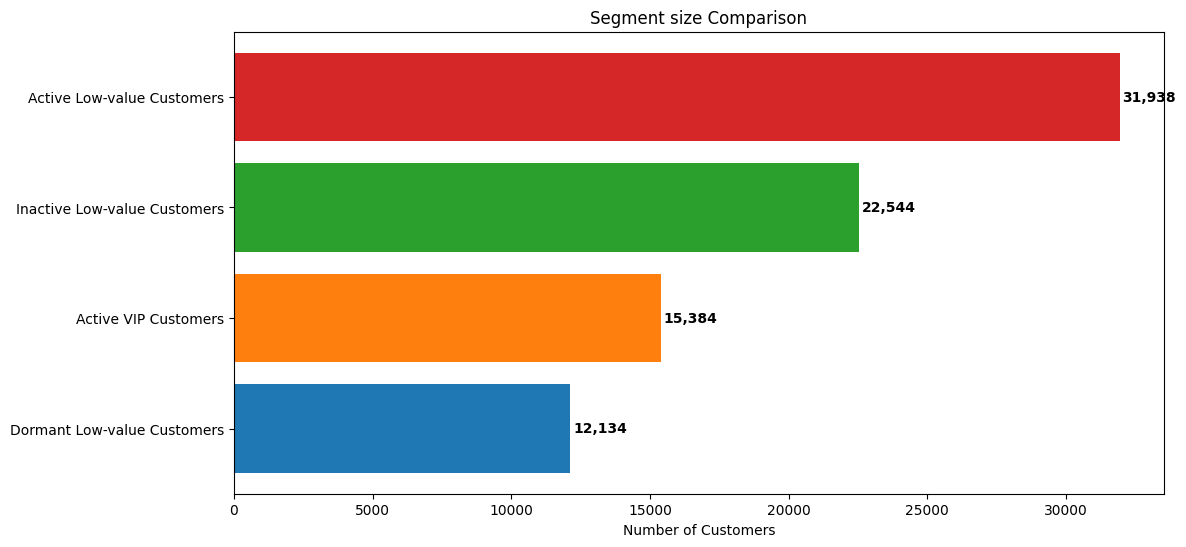

In [210]:
#  Horizontal Bar Chart

plt.figure(figsize=(12, 6))
segment_sizes = cluster_profiles.sort_values('Customer_Count')['Customer_Count']
plt.barh(range(len(segment_sizes)), segment_sizes.values, color=colors[:len(segment_sizes)])
plt.yticks(range(len(segment_sizes)), segment_sizes.index)
plt.xlabel('Number of Customers')
plt.title('Segment size Comparison')
for i, v in enumerate(segment_sizes.values):
    plt.text(v + 100, i, f'{v:,}',va='center', fontweight='bold')

plt.tight_layout
plt.show()

# **Customer Segment Dataset Generation**

Output Customisation:
When include_all_columns=False, only key columns are retained for clarity: CustomerID, Recency, Frequency, Monetary, R_Score, F_Score, M_Score, Cluster, and Cluster_Name.

When include_all_columns=True, the complete DataFrame is returned, preserving all original attributes for deeper analysis.

**Sorting Logic:** The resulting dataset is sorted first by Cluster_Name (grouping customers within the same segment) and then by Monetary in descending order, highlighting the most valuable customers in each group.

**Optional Export:** If a file path is provided via output_csv, the dataset is automatically exported as a CSV file. A success message confirms the save location for traceability.

**Output Summary:** After processing, the function prints a summary showing:
The total number of customers is included.
The number of distinct customer segments (Cluster_Name) identified.

**Return Value:** Returns the processed and sorted DataFrame, which can be displayed directly (as shown using display(segmented_df.head())) or used for subsequent business reporting and visualisation.

Outcome:The function provides a structured, human-readable dataset that bridges analytical results with actionable insights, enabling quick access to customer profiles and facilitating strategic, segmentation-driven marketing decisions.


In [211]:
def get_segmented_customers(rfm_df, include_all_columns=False, output_CSV=None):


    # Base columns to always include
    base_columns = [
        'CustomerID', 'Recency', 'Frequency', 'Monetary',
        'R_score', 'F_score', 'M_score', 'RFM_Score',
        'Cluster', 'Cluster_Name'
    ]

    if include_all_columns:
        segmented_customers = rfm_df.copy()
    else:
        # Only keep columns that actually exist in rfm_df
        available_columns = [col for col in base_columns if col in rfm_df.columns]
        segmented_customers = rfm_df[available_columns].copy()

    # Sort by Cluster_Name then Monetary (descending)
    segmented_customers.sort_values(
        by=['Cluster_Name', 'Monetary'],
        ascending=[True, False],
        inplace=True
    )
    segmented_customers.reset_index(drop=True, inplace=True)

    # Save to CSV if path provided
    if output_CSV:
        segmented_customers.to_csv(output_CSV, index=False)
        print(f"Dataset saved to CSV: {output_CSV}")

    print(
        f"Segmented dataset created: {len(segmented_customers)} customers "
        f"across {rfm_df['Cluster_Name'].nunique()} segments."
    )
    return segmented_customers


#....Usage Example....

segmented_df = get_segmented_customers(
    rfm_df,
    include_all_columns=False,
    output_CSV='segmented_customers.csv'
)
display(segmented_df.head())




Dataset saved to CSV: segmented_customers.csv
Segmented dataset created: 82000 customers across 4 segments.


,CustomerID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score,Cluster,Cluster_Name
0,C5137094,11,20,9099.15,5,4,4,13,1,Active Low-value Customers
1,C1130501,2,5,8608.89,5,2,4,11,1,Active Low-value Customers
2,C4965830,41,15,8201.27,4,3,4,11,1,Active Low-value Customers
3,C6537308,4,7,7719.77,5,3,4,12,1,Active Low-value Customers
4,C9210351,14,15,7346.70,5,3,4,12,1,Active Low-value Customers


In [212]:
segmented_df['Cluster_Name'].value_counts()

,count
Cluster_Name,
Active Low-value Customers,31938
Inactive Low-value Customers,22544
Active VIP Customers,15384
Dormant Low-value Customers,12134
